# Digit recognizer. Part 1. KNN.

## Loading packages and data.

In [82]:
import pandas as pd
import numpy  as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [151]:
df_train = pd.read_csv("C:/Users/pozir/OneDrive/Documentos/XDigit_Recognizer/train.csv")
df_test = pd.read_csv("C:/Users/pozir/OneDrive/Documentos/XDigit_Recognizer/test.csv")

## Viewing the data

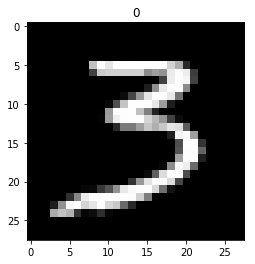

In [153]:
i=25
img=df_train.drop('label', axis=1).iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(df_train.drop('label', axis=1).iloc[i,0])

In [152]:
print(df_train.head(5))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [39]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


We´ve got 42 thousand examples in the train set - it´ll take way to long to train a model, we´d better reduce it to let´s say 8 thousand example for train and 2 thousand for test/hold out set respectively.

## Creating arrays for the features and the response variable and dividing them into train and hold out sets.


In [84]:
X=df_train.iloc[5000:15000,1:].values # ".values" make them into arrays
y=df_train.iloc[5000:15000,:1].values

In [85]:
# Split df_train into training and test(hold out) set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 784)
(8000, 1)
(2000, 784)
(2000, 1)


## Over- and underfitting problems.


In [87]:
# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
knn.score(X_train, y_train.ravel()) 

0.9655

0.9655 accuracy! not bad, right?

In [89]:
knn.score(X_test, y_test.ravel())

0.9435

Though on the unseen data our model performes significantly worse predicting only 94% of the data correctly. 

Let´s compute and plot the training and testing accuracy scores for different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will check for overfitting and underfitting.

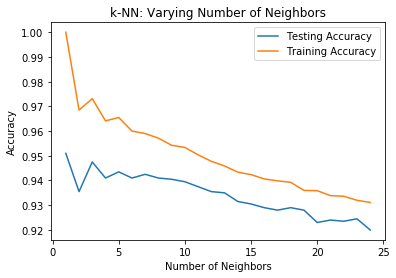

In [90]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see how the accuracy differs while training and testing. Normally a small number of neighbors can lead to an overfit model (using 1 neighbor it predicts 100% correctly on the seen data and drops down to 95% when predicting on the unseen data), while a large number of neigbors can lead to an underfit model. To better estimate how well our model will do with different numbers of neighbors we are going to use Tuning Grid Search and 5-fold cross-validation.


## Tuning Grid Search

In [91]:
# Setup the hyperparameter grid
neighbors = np.arange(1,9)
param_grid = {'n_neighbors': neighbors}


In [92]:
# Instantiate a knn classifier: knn
knn = KNeighborsClassifier()
# Instantiate the GridSearchCV object: knn_cv
knn_cv = GridSearchCV(knn,param_grid, cv= 5)


In [93]:
# Fit it to the data
knn_cv.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))


Tuned KNN Parameters: {'n_neighbors': 1}
Best score is 0.9435


It says that the best result can be reached using 1 neighbor and the average accuracy is  0.9435 let´s see how it does on the unseen data.

In [96]:
knn_cv.score(X_test, y_test.ravel())

0.951

0.951 on the training set - our model overfits a lot less now:), let´s predict on the train data.

## Predicting and saving the results

In [97]:
predict = knn_cv.predict(df_test)

In [140]:
df=pd.DataFrame(predict)
df.index+=1

In [141]:
final_submission=pd.DataFrame({"ImageId": list(range(1,len(predict)+1)),
                         "Label": predict})


In [146]:
final_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [150]:
final_submission.to_csv("submission.csv", index=False, header=True)